In [1]:
from profiler.core import *

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
def plot_graph(graph, label=False, directed=False, circle=False):
    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    for e in graph.get_edges():
        if label:
            G.add_edge(graph.idx_to_name[e[0]], graph.idx_to_name[e[1]])
        else:
            G.add_edge(e[0], e[1])
    if circle:
        nx.draw(G, with_labels=True, pos=nx.circular_layout(G))
    else:
        nx.draw(G, with_labels=True)
    plt.draw()
    return G
def print_tree(T, node, level=0):
    print("{}[{}]{}".format("--"*level, node, T.idx_to_name[node]))
    for c in T.get_children(node):
        print_tree(T, c, level+1)

In [3]:
pf = Profiler(workers=2, verbose=False, tol=0.01, eps=0.1)

In [4]:
pf.session.load_data(name='flights', src='file', fpath='/Users/zhihan/Documents/bart/data/clean_data/flights.csv', embedtxt=False)
#pf.session.load_data(name='hospital', src='file', fpath='data/hospital.csv', embedtxt=False)

INFO:profiler.utility:[0.5170021057128906] Load Data start

INFO:profiler.dataset:inferred types of attributes: {
    "airlineid": "text",
    "sairportid": "text",
    "dairportid": "text",
    "codeshare": "categorical",
    "eq1": "categorical",
    "eq2": "categorical",
    "eq3": "categorical",
    "eq4": "categorical",
    "eq5": "categorical",
    "eq8": "categorical",
    "eq12": "categorical",
    "eq14": "categorical",
    "eq15": "categorical",
    "eq17": "categorical",
    "eq19": "categorical",
    "eq20": "categorical",
    "eq22": "categorical",
    "eq25": "categorical",
    "eq28": "categorical",
    "eq30": "categorical",
    "eq31": "categorical",
    "eq45": "categorical",
    "eq46": "categorical",
    "eq71": "categorical",
    "name1": "numeric",
    "name2": "categorical",
    "name4": "categorical",
    "acountry": "text",
    "active": "categorical",
    "scity": "text",
    "scountry": "text",
    "slatitude": "numeric",
    "slongitude": "numeric",
    "sti

In [5]:
# pf.session.ds.change_dtypes(['ProviderNumber', 'ZipCode', 'PhoneNumber', 'State'], 
#                          ['categorical', 'numeric', 'categorical', 'text'])

In [6]:
# TODO save embedding vectors
# pf.session.load_embedding()

In [7]:
pf.session.load_training_data()
pf.session.learn_structure()


INFO:profiler.utility:[6.054826021194458] Create Training Data start

INFO:profiler.transformer:needs multiplier = 5 to bound the error in inv cov estimation <= 0.10000000
INFO:profiler.transformer:use multiplier = 5, and the bound is 0.00008716
INFO:profiler.transformer:Draw Pairs
100%|██████████| 41/41 [00:06<00:00,  6.05it/s]
INFO:profiler.transformer:Number of training samples: 2728468
INFO:profiler.transformer:Computing Differences
INFO:profiler.transformer:estimated missing data probability in training data is 0.0000
INFO:profiler.utility:[47.59748578071594] Create Training Data execution time: 41.542659759521484

INFO:profiler.utility:[47.598196029663086] Learn Structure start

INFO:profiler.graph:use threshold 0.0374
INFO:profiler.utility:[48.34933400154114] Learn Structure execution time: 0.7511379718780518



In [8]:
s = pf.session.struct_engine
inv_cov = s.inv_cov
cov = s.est_cov

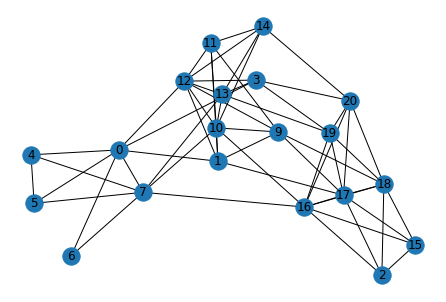

In [14]:
dg = s.construct_moral_graphs(s.inv_cov)
plot_graph(dg)

In [15]:
gs = dg.get_undirected_connected_components()

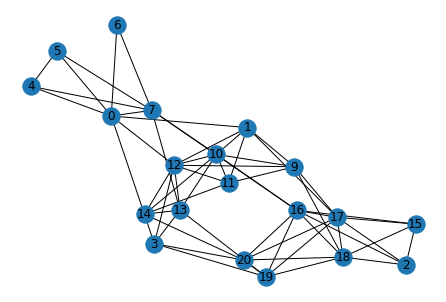

In [16]:
G = gs[0]
netg = plot_graph(G)

In [17]:
from profiler.graph import *
TD = treewidth_decomp(G)

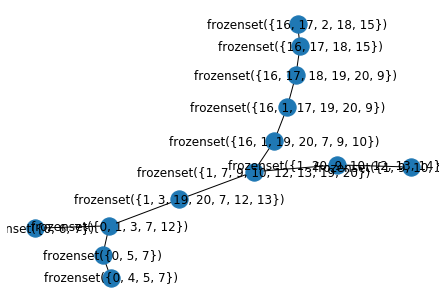

In [18]:
plot_graph(TD, label=True)

In [19]:
TD.idx_to_name

{0: frozenset({1, 7, 9, 10, 12, 13, 19, 20}),
 1: frozenset({1, 7, 9, 10, 16, 19, 20}),
 2: frozenset({1, 9, 10, 12, 13, 14, 20}),
 3: frozenset({1, 3, 7, 12, 13, 19, 20}),
 4: frozenset({1, 9, 16, 17, 19, 20}),
 5: frozenset({9, 16, 17, 18, 19, 20}),
 6: frozenset({1, 9, 10, 11, 12, 14}),
 7: frozenset({15, 16, 17, 18}),
 8: frozenset({2, 15, 16, 17, 18}),
 9: frozenset({0, 1, 3, 7, 12}),
 10: frozenset({0, 5, 7}),
 11: frozenset({0, 4, 5, 7}),
 12: frozenset({0, 6, 7})}

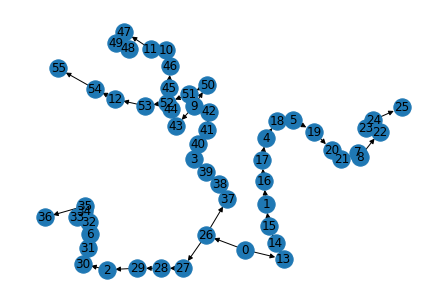

In [20]:
NTD = s.nice_tree_decompose(TD)
plot_graph(NTD, label=False, directed=True)

In [21]:
print_tree(NTD, NTD.root)

[0]frozenset({1, 7, 9, 10, 12, 13, 19, 20})
--[13]frozenset({1, 7, 9, 10, 12, 13, 19, 20})
----[14]frozenset({1, 7, 9, 10, 13, 19, 20})
------[15]frozenset({1, 7, 9, 10, 19, 20})
--------[1]frozenset({1, 7, 9, 10, 16, 19, 20})
----------[16]frozenset({1, 7, 9, 16, 19, 20})
------------[17]frozenset({1, 9, 16, 19, 20})
--------------[4]frozenset({1, 9, 16, 17, 19, 20})
----------------[18]frozenset({9, 16, 17, 19, 20})
------------------[5]frozenset({9, 16, 17, 18, 19, 20})
--------------------[19]frozenset({16, 17, 18, 19, 20})
----------------------[20]frozenset({16, 17, 18, 20})
------------------------[21]frozenset({16, 17, 18})
--------------------------[7]frozenset({16, 17, 18, 15})
----------------------------[8]frozenset({2, 15, 16, 17, 18})
------------------------------[22]frozenset({16, 17, 18, 15})
--------------------------------[23]frozenset({16, 17, 18})
----------------------------------[24]frozenset({17, 18})
------------------------------------[25]frozenset({18})
--[26

In [22]:
# dynamic programming
leaves = NTD.out_degrees.index.values[NTD.out_degrees['degree'] == 0]

In [23]:
from profiler.utility import find_all_subsets

In [86]:
def union_and_check_cycle(sets):
    s0 = sets[0]
    # each set is a dictionary with left: [all rights] s.t. there is a directed edge from left to right
    for s in sets[1:]:
        for (l, rights) in s.items():
            for r in rights:
                # try to add (l,r) to s0
                # if (r,l) in s0 as well, has a cycle
                if r in s0:
                    if l in s0[r]:
                        return None
                if l in s0:
                    if r in s0[l]:
                        # path already exists
                        continue
                # else, add the edge
                s0[l].append(r)
                # add transitive closure
                # everything pointing to l now, should also points to r
                for ll in s0:
                    if ll == l or ll == r:
                        continue
                    if l in s0[ll] and r not in s0[ll]:
                        if r in s0:
                            if ll in s0[r]:
                                # cycle
                                return None
                        s0[ll].append(r)
    return s0

In [95]:
R = {}

In [98]:
def score(j, S):
    S = list(S)
    k = len(S)
    score = cov.iloc[j,j] - (cov.iloc[j,S].values.reshape(1,-1) * np.linalg.inv(cov.iloc[S,S].values.reshape(k,k)) * cov.iloc[S,j].values.reshape(-1,1))[0][0]
    return score

def is_eq_dict(dic1, dic2):
    # TODO
    if len(dic1.keys()) != len(dic2.keys()):
        return False
    for k1 in dic1:
        if k1 not in dic2:
            return False
        if dic1[k1] != dic2[k2]:
            return False
    return True
    
def dfs(G, tree, t):
    if t in R:
        print("retrieved Rt")
        return R[t]
    # R(a,p,s): a - parent sets; p: directed path, s:score
    if tree.node_types[t] == JOIN:
        candidates = {}
        # has children t1 and t2
        t1, t2 = tree.get_children(t)
        for (a1, p1, s1) in dfs(G, tree, t1):
            for (a2, p2, s2) in dfs(G, tree, t2):
                if not is_eq_dict(a1, a2):
                    continue
                a = a1
                p = union_and_check_cycle([p1, p2])
                if p is None:
                    continue
                s = s1 + s2
                if s not in candidates:
                    candidates[s] = []
                candidates[s].append((a, p, s))
        Rt = candidates[min(list(candidates.keys()))]
        R[t] = Rt
        return Rt
    elif tree.node_types[t] == INTRO:
        # has only one child
        child = tree.get_children(t)[0]
        Xt = tree.idx_to_name[t]
        Xtc = tree.idx_to_name[child]
        v0 = list(Xt - tree.idx_to_name[child])[0]
        Rt = []
        print("node t = {} with X(t) = {} ".format(t, Xt))
        for P in find_all_subsets(set(G.get_neighbors(v0))):
            Rtcs = dfs(G, tree, child)
            for Rtc in Rtcs:
                print(Rtc)
                aa, pp, ss = Rtc
                # parent sets
                a = {}
                a[v0] = P
                for v in Xtc:
                    a[v] = aa[v]
                # directed path
                p1 = {}
                for u in P:
                    p1[u] = [v0]
                p2 = {}
                for u in Xtc:
                    for vv in aa[u]:
                        if vv not in p2:
                            p2[vv] = []
                        p2[vv].append(u)
                p = union_and_check_cycle([pp, p1, p2])
                if p is None:
                    continue
                s = ss
                # since score does not change, all should have same score
                Rt.append(s)
        R[t] = Rt
    elif tree.node_types[t] == FORGET:
        # has only one child
        child = tree.get_children(t)[0]
        Xt = tree.idx_to_name[t]
        v0 = list(tree.idx_to_name[child] - Xt)[0]
        candidates = {}
        for (aa, pp, ss) in dfs(G, tree, child):
            a = {}
            for v in Xt:
                a[v] = aa[v]
            p = {}
            for u in pp:
                if u not in Xt:
                    continue
                p[u] = [v for v in pp[u] if v in Xt]
            s = ss + score(v0, aa[v0])
            if s not in candidates:
                candidates[s] = []
            candidates[s].append((a, p, s))
        Rt = candidates[min(list(candidates.keys()))]
        R[t] = Rt
    else:
        # leaf
        min_score = 100000
        # 1. P is a subset of all the neighbors of the vertex in leaf 
        candidates = {}
        Xt = tree.idx_to_name[t]
        v = list(Xt)[0]
        for P in find_all_subsets(set(G.get_neighbors(v))):
            a = {v: P}
            s = score(list(Xt)[0], P)
            p = {}
            for u in P:
                p[u] = [v]
            if s not in candidates:
                candidates[s] = []
            candidates[s].append((a, p, s))
        # get minimal-score records
        Rt = candidates[min(list(candidates.keys()))]
        R[t] = Rt
        print("R for node t = {} with X(t) = {} ".format(t, Xt))
        print(Rt)
    return Rt

In [99]:
R = dfs(G, NTD, 12)

node t = 12 with X(t) = frozenset({0, 6, 7}) 
node t = 54 with X(t) = frozenset({6, 7}) 
retrieved Rt
({7: (0, 4, 5, 6, 10, 13, 16)}, {0: [7, 6], 4: [7], 5: [7], 6: [7], 10: [7], 13: [7], 16: [7]}, -0.14951473530512513)
retrieved Rt
({7: (0, 4, 5, 6, 10, 13, 16)}, {0: [7, 6], 4: [7], 5: [7], 6: [7], 10: [7], 13: [7], 16: [7]}, -0.14951473530512513)
retrieved Rt
({7: (0, 4, 5, 6, 10, 13, 16)}, {0: [7, 6], 4: [7], 5: [7], 6: [7], 10: [7], 13: [7], 16: [7]}, -0.14951473530512513)
-0.14951473530512513


TypeError: 'numpy.float64' object is not iterable